## Clustering: Scikit-learn Blobs

** Dataset Information: **
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.htmluto/data

** Attribute Information: (2 features) **

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=seed)
                  
** Objective of this project **

Cluster blobs into four groups

## Data

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Fix random seed for reproducibility
seed = 101
np.random.seed(seed)

In [8]:
# Load Data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=seed)

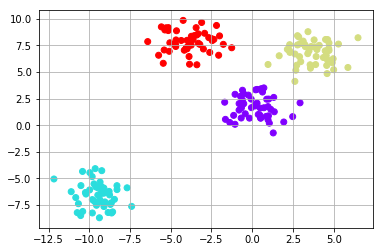

In [33]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1],c=y, cmap='rainbow')
plt.grid()

## K Means Clustering

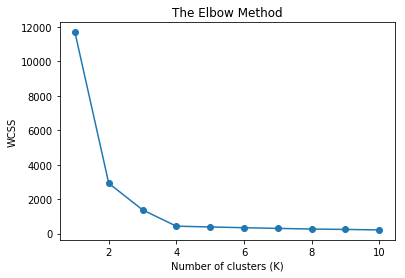

In [50]:
# Use the elbow method to find the optimal K, if k is unknown 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = seed)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o') #within-cluster sum of squares
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [51]:
# Fit K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

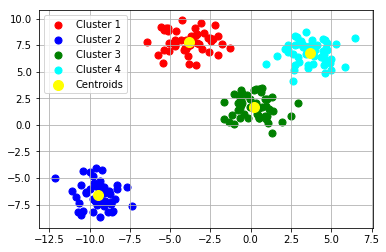

In [53]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend()

# Hierarchical Clustering

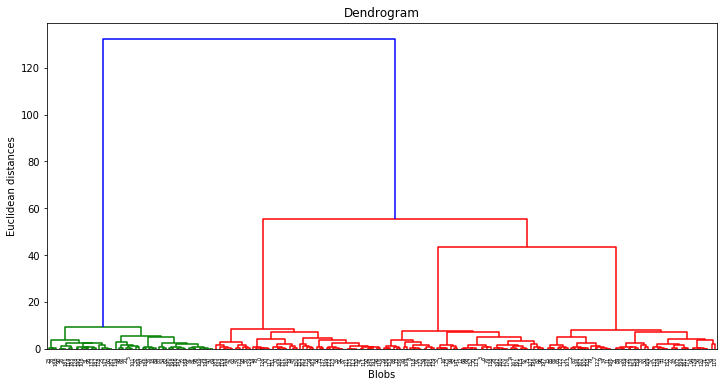

In [57]:
# Use the dendrogram to find the optimal number of clusters, if k is unknown
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Blobs')
plt.ylabel('Euclidean distances')
plt.show()

In [59]:
# Fit hc to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

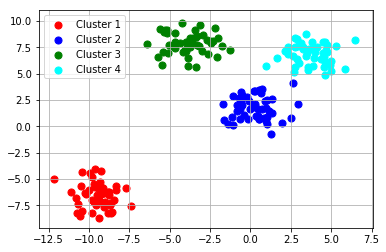

In [61]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.grid()
plt.legend()